# 過去５年のビットコイン価格データを取得

## Yahoo FinanceのPythonライブラリを利用

In [ ]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 引数情報
symbol = "BTC-JPY"  # 仮想通貨の銘柄を指定
period = "5y"      # データ取得範囲を指定

# データ取得
Ticker = yfinance.Ticker(symbol)
data   = Ticker.history(period=period)

# 出力
#print(data)

# 毎日1,000円のビットコイン購入時の５年後の成績を計算

In [171]:
current_price = data.Close[-1]
purchase = 1000

amount = purchase / data.Close

total_amount = sum(amount)
total_purchase = purchase * len(amount)
unit_price = total_purchase / total_amount
valuation = total_amount * current_price
profit = valuation - total_purchase

print("購入数:", round(total_amount, 5), "BTC")
print("単価:", int(unit_price), "円")
print("購入価額:", int(total_purchase), "円")
print("評価額:", int(valuation), "円")
print("利益:", int(profit), "円")

購入数: 1.45167 BTC
単価: 1258547 円
購入価額: 1827000 円
評価額: 5657338 円
利益: 3830338 円


# 価格の推移をグラフ化するためのデータ作成

In [155]:
close = data.Close
#print(close)

data_ = pd.DataFrame(columns=['Amount', 'Purchase', 'UnitPrice', 'Valuation', 'Profit'])
total_amount = 0
total_purchase = 0
for i in range(len(amount)):
    total_amount += amount[i]
    total_purchase += purchase
    valuation = total_amount * close[i]
    data_.loc[close.index[i]] = [total_amount, total_purchase, total_purchase/total_amount, valuation, valuation - total_purchase]

#print(data_)

# ビットコイン価格の推移

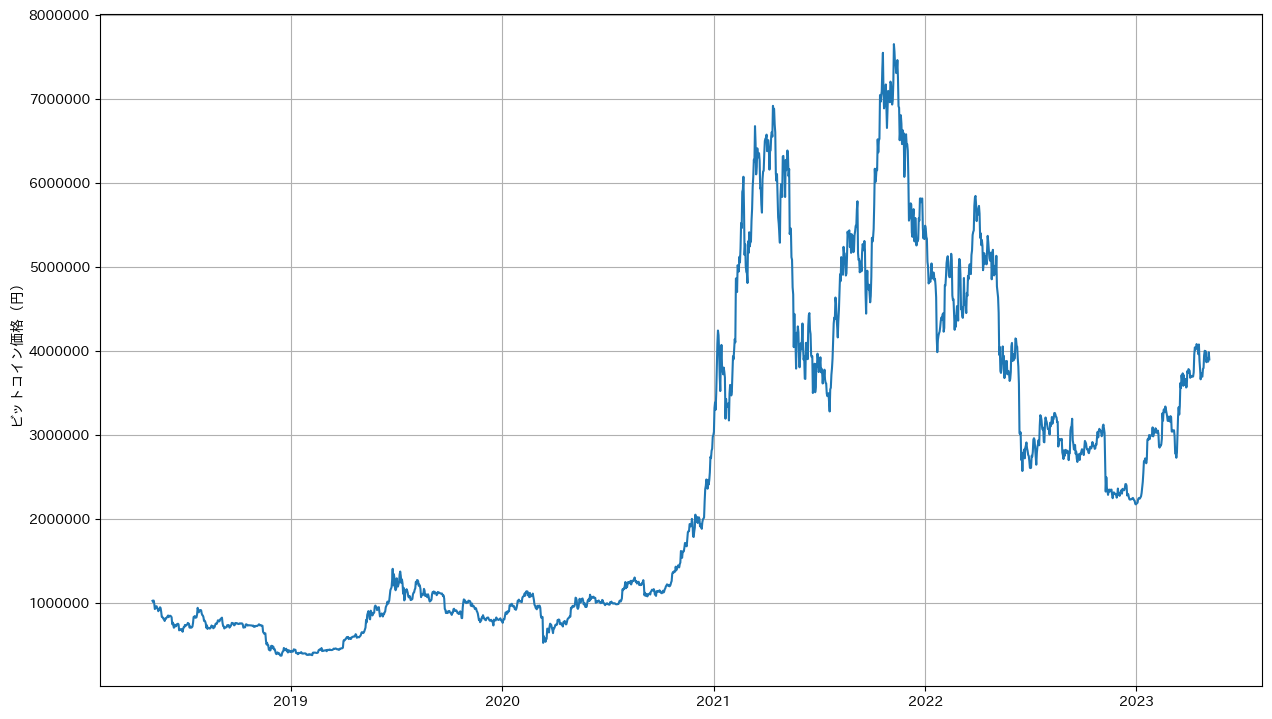

In [172]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_ylabel("ビットコイン価格（円）")
plt.ticklabel_format(style='plain')
plt.plot(close)
plt.show()

# 購入量の推移

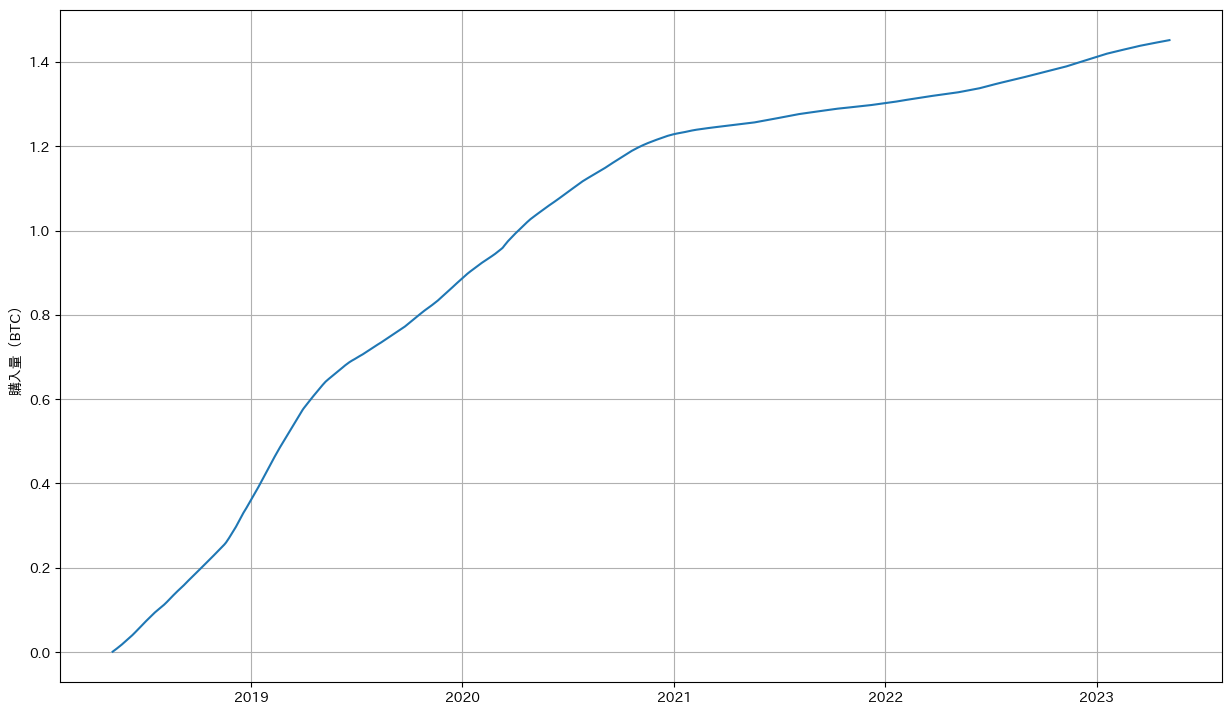

In [173]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("購入量（BTC）")
plt.ticklabel_format(style='plain')
plt.plot(data_.Amount)
plt.show()

# 評価損益の推移

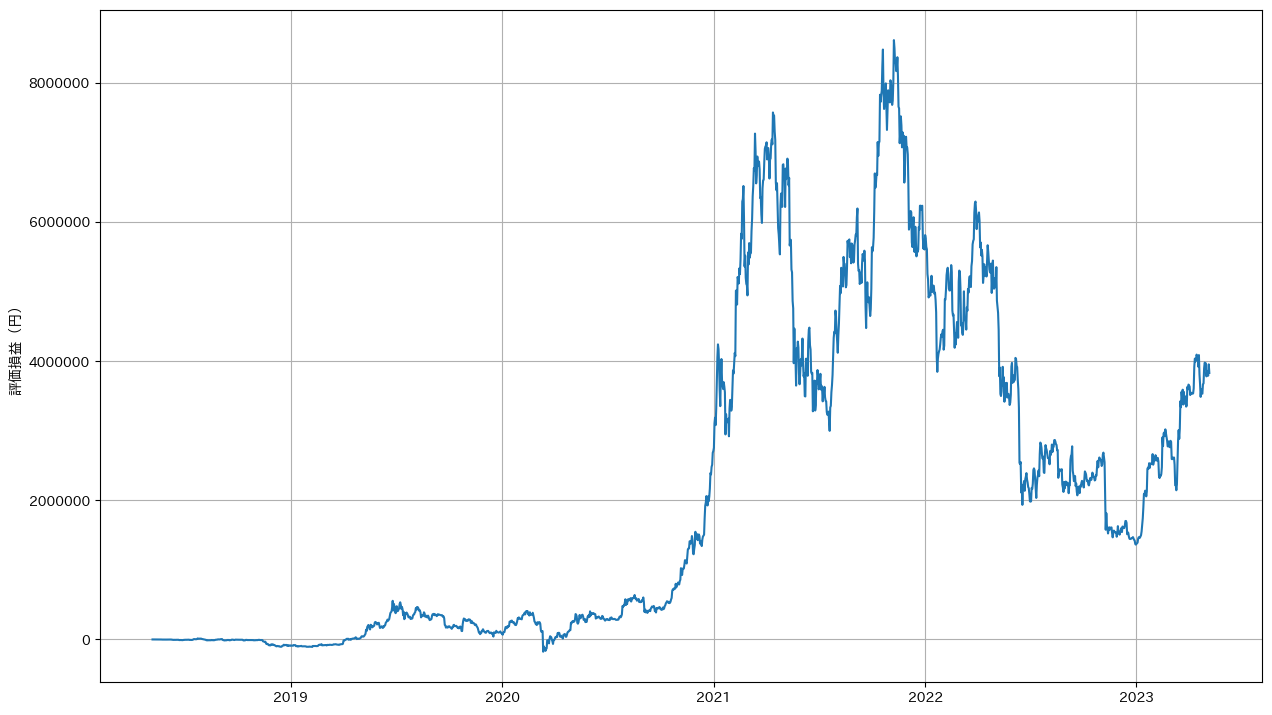

In [174]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("評価損益（円）")
plt.ticklabel_format(style='plain')
plt.plot(data_.Profit)
plt.show()

# 評価額の推移

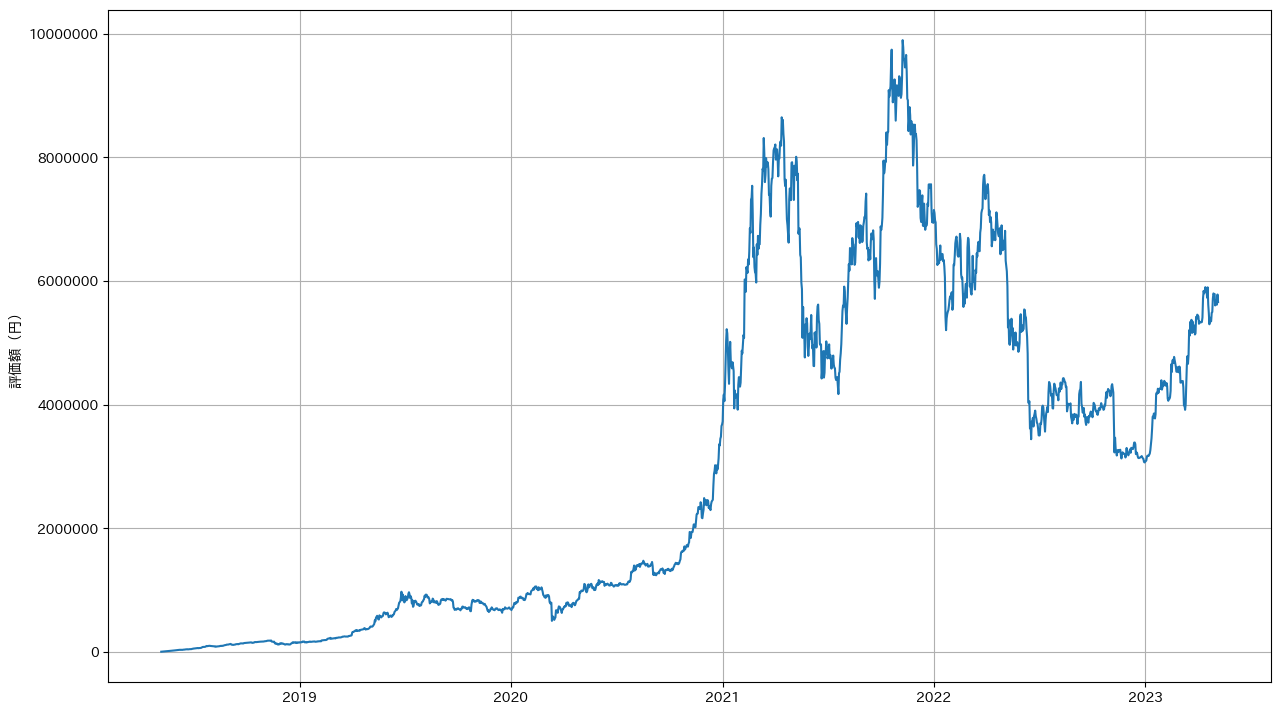

In [175]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("評価額（円）")
plt.ticklabel_format(style='plain')
plt.plot(data_.Valuation)
plt.show()

# 購入価額の推移

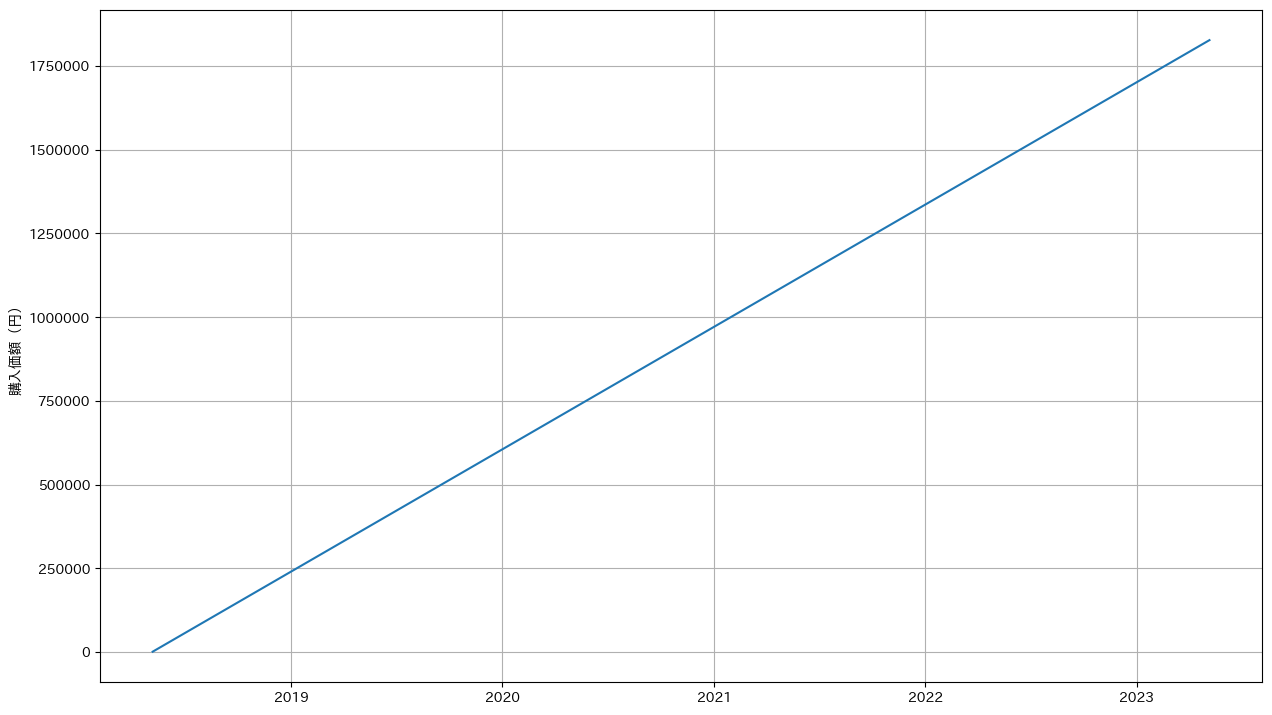

In [176]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("購入価額（円）")
plt.ticklabel_format(style='plain')
plt.plot(data_.Purchase)
plt.show()

# 購入単価の推移

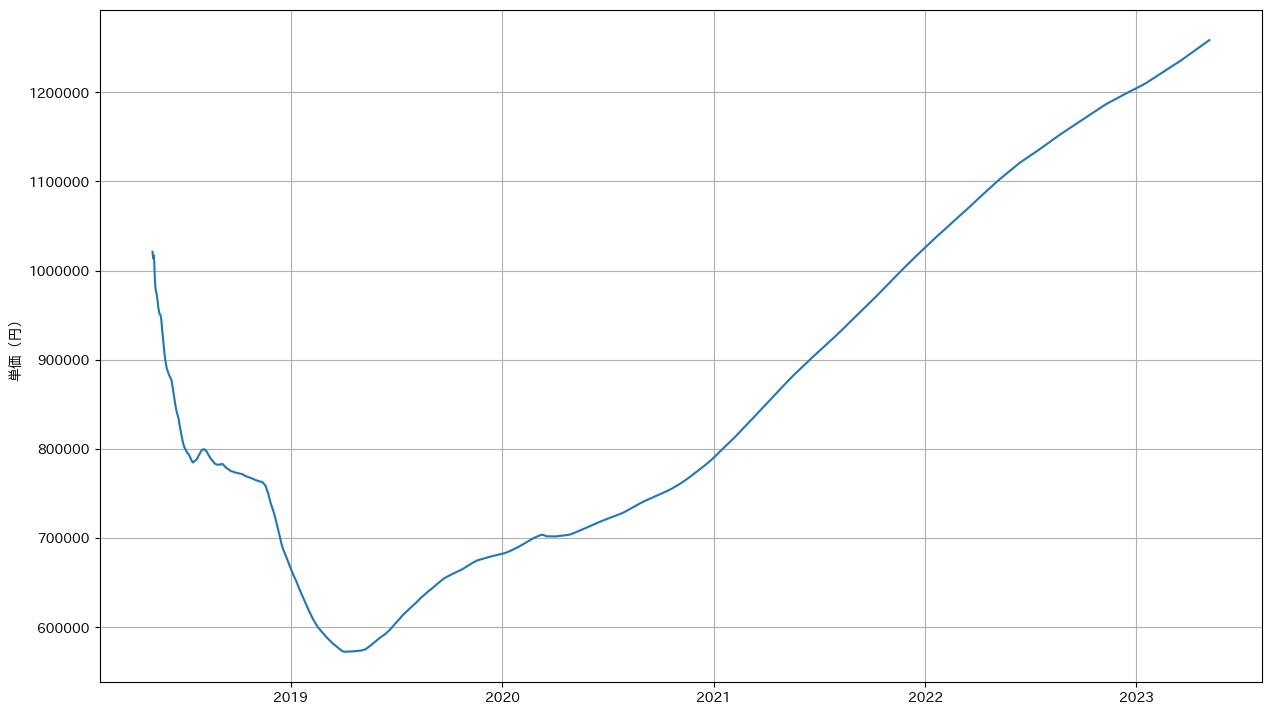

In [177]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("単価（円）")
plt.ticklabel_format(style='plain')
plt.plot(data_.UnitPrice)
plt.show()

# 購入単価とビットコイン価格の推移

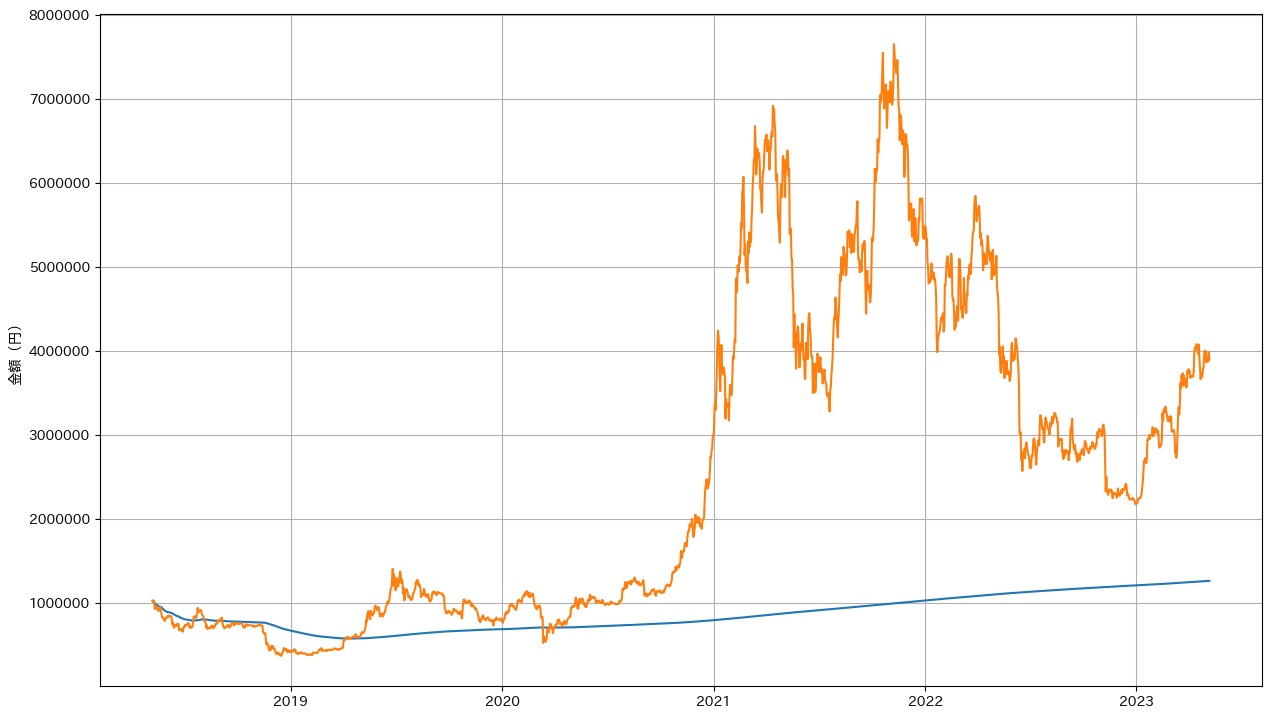

In [169]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("金額（円）")
plt.ticklabel_format(style='plain')
plt.plot(data_.UnitPrice)
plt.plot(close)
plt.show()

# 評価額と購入価額の推移

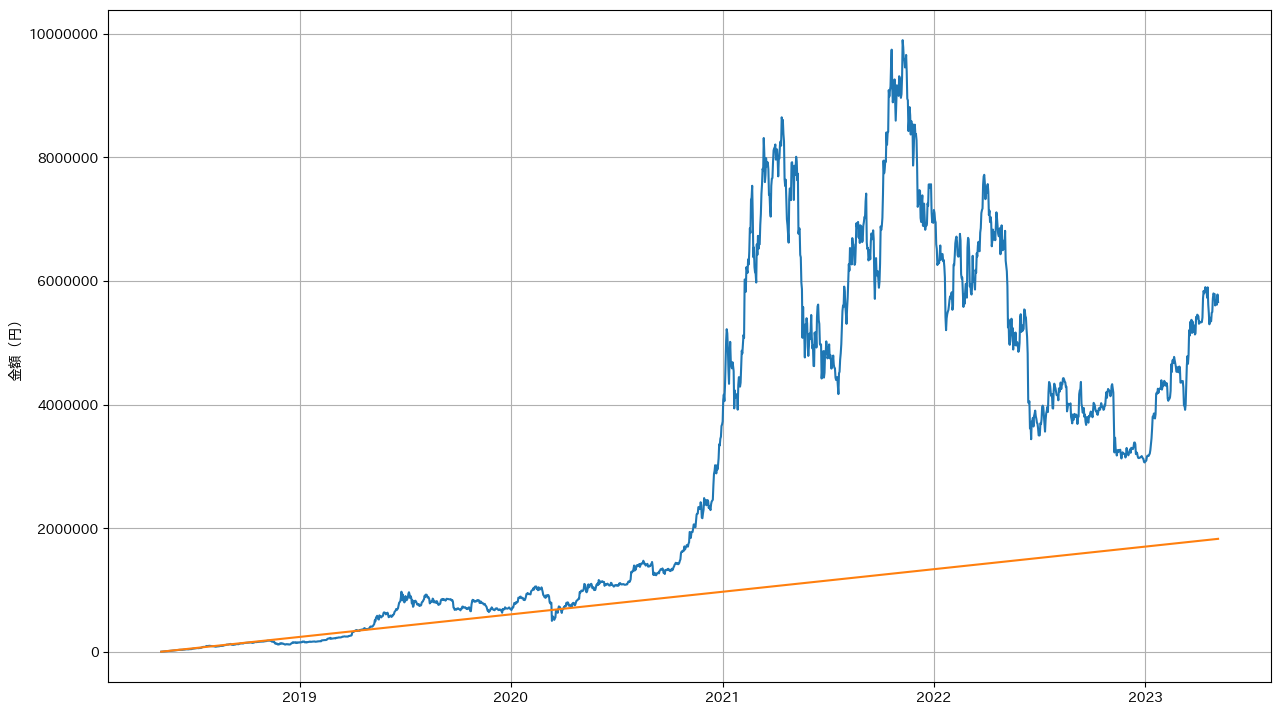

In [170]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("金額（円）")
plt.ticklabel_format(style='plain')
plt.plot(data_.Valuation)
plt.plot(data_.Purchase)
plt.show()